<a href="https://colab.research.google.com/github/Praharshita23/HR-attrition-Analysis/blob/main/hr_attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

import sklearn
import sklearn.metrics as met
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings


<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [ ]:
data=pd.read_csv('/content/HR-Employee-Attrition (1).csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
data.shape

(1470, 35)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DailyRate'),
  Text(2, 0, 'DistanceFromHome'),
  Text(3, 0, 'Education'),
  Text(4, 0, 'EmployeeCount'),
  Text(5, 0, 'EmployeeNumber'),
  Text(6, 0, 'EnvironmentSatisfaction'),
  Text(7, 0, 'HourlyRate'),
  Text(8, 0, 'JobInvolvement'),
  Text(9, 0, 'JobLevel'),
  Text(10, 0, 'JobSatisfaction'),
  Text(11, 0, 'MonthlyIncome'),
  Text(12, 0, 'MonthlyRate'),
  Text(13, 0, 'NumCompaniesWorked'),
  Text(14, 0, 'PercentSalaryHike'),
  Text(15, 0, 'PerformanceRating'),
  Text(16, 0, 'RelationshipSatisfaction'),
  Text(17, 0, 'StandardHours'),
  Text(18, 0, 'StockOptionLevel'),
  Text(19, 0, 'TotalWorkingYears'),
  Text(20, 0, 'TrainingTimesLastYear'),
  Text(21, 0, 'WorkLifeBalance'),
  Text(22, 0, 'YearsAtCompany'),
  Text(23, 0, 'YearsInCurrentRole'),
  Text(24, 0, 'YearsSinceLastPromotion'),
  Text(25, 0, 'Ye

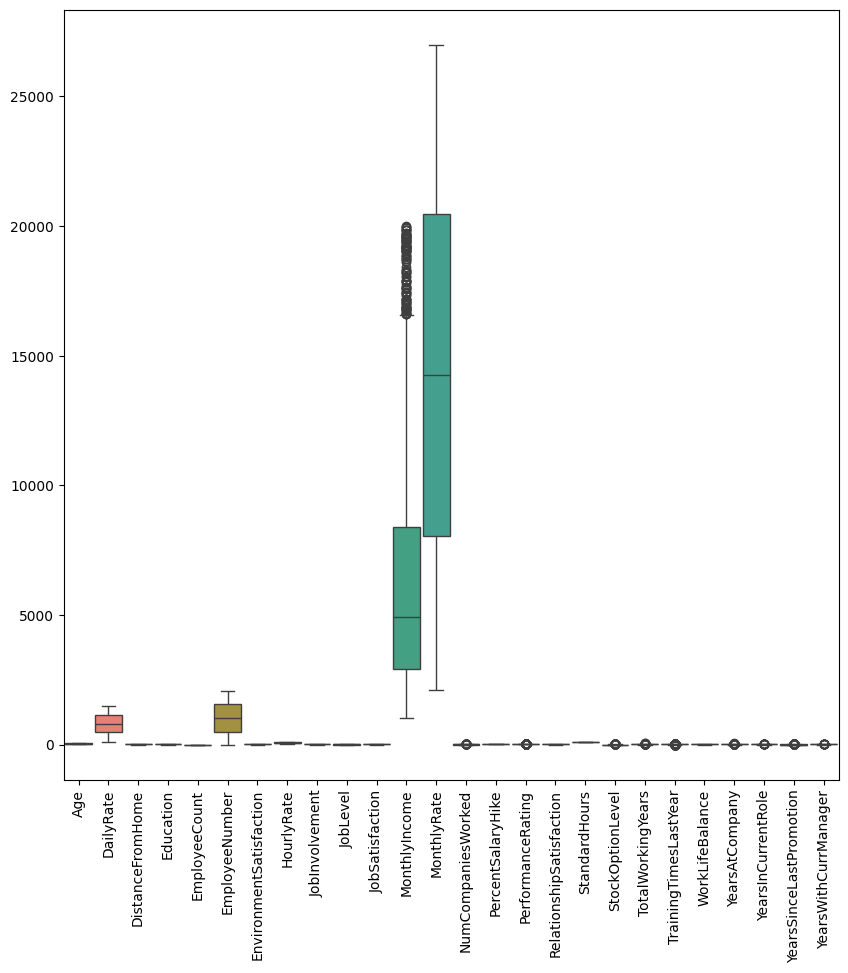

In [ ]:
plt.figure(figsize=(10,10))
p = sns.boxplot(data = data,orient = 'v',width=0.9)
plt.xticks(rotation=90)

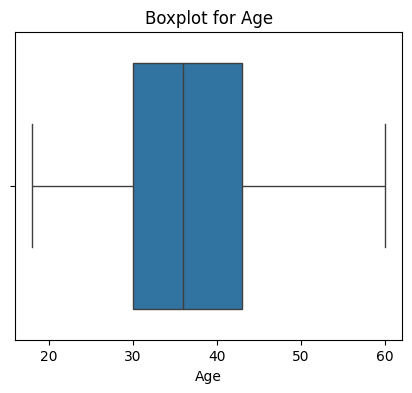

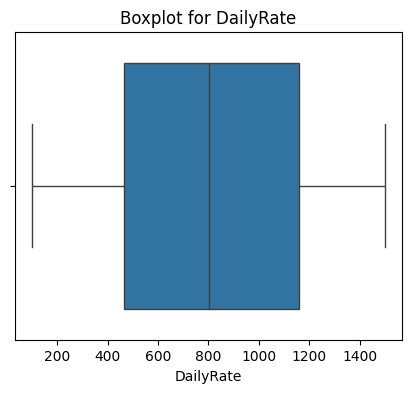

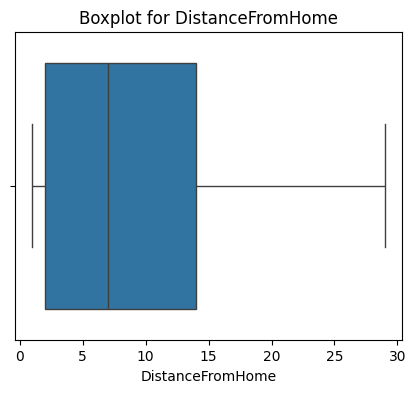

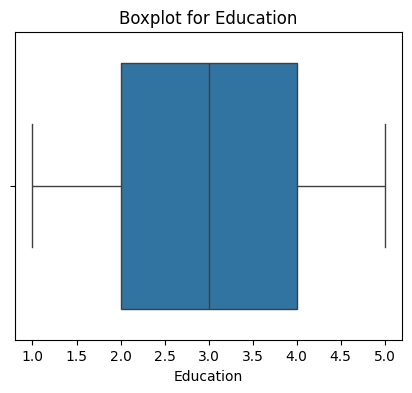

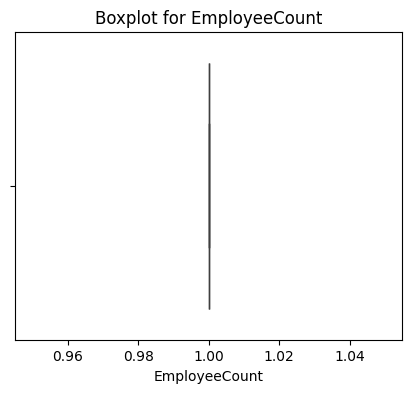

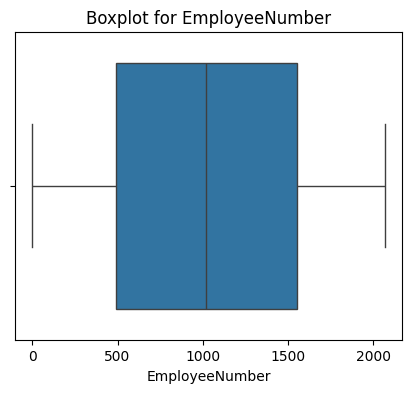

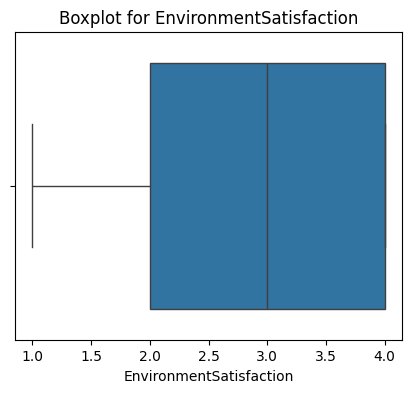

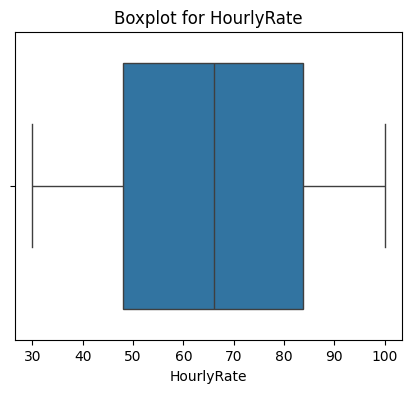

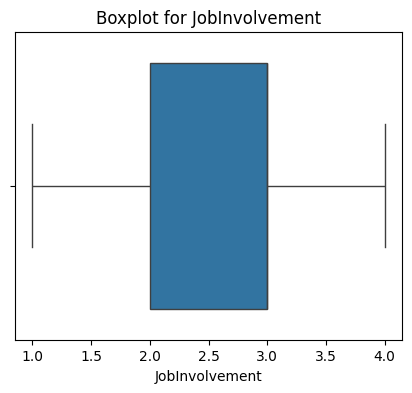

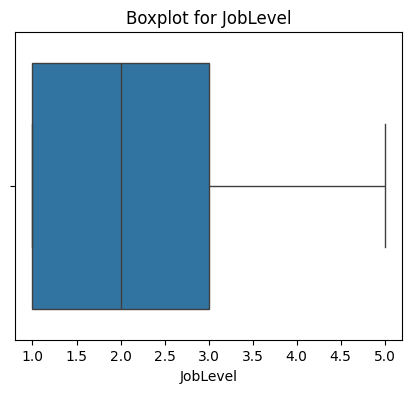

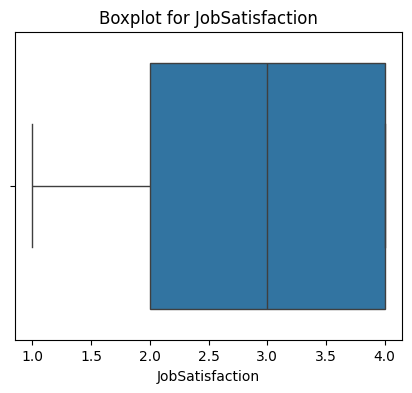

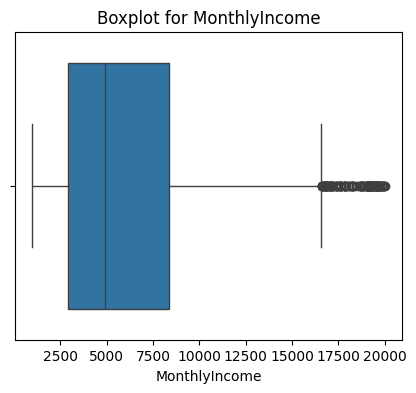

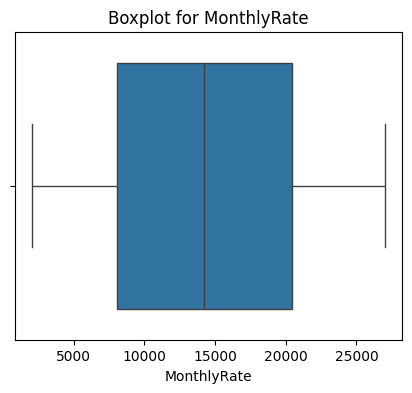

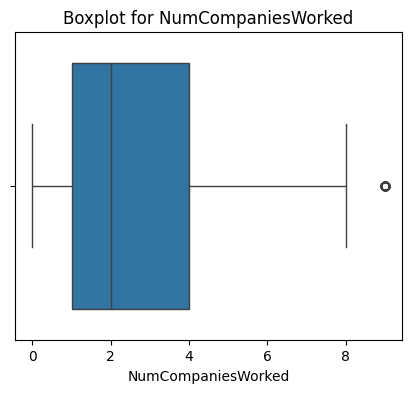

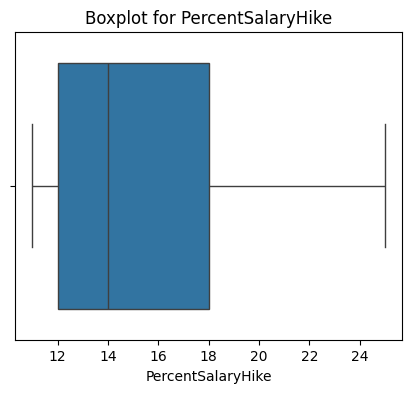

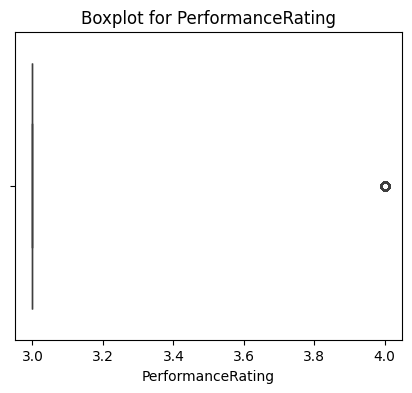

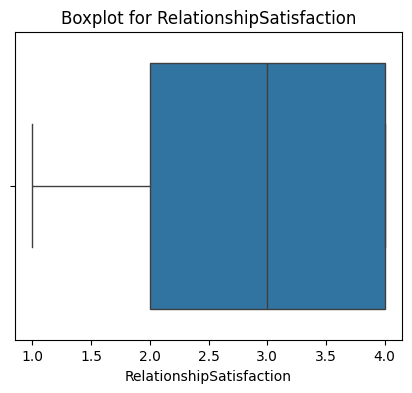

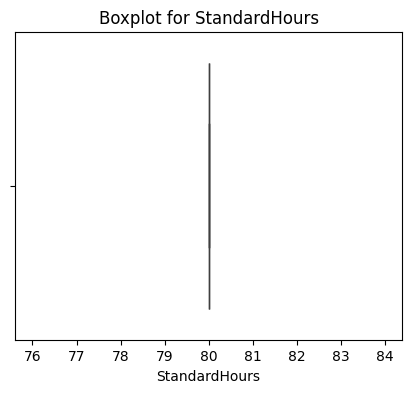

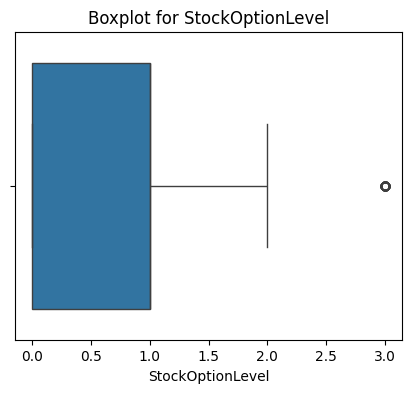

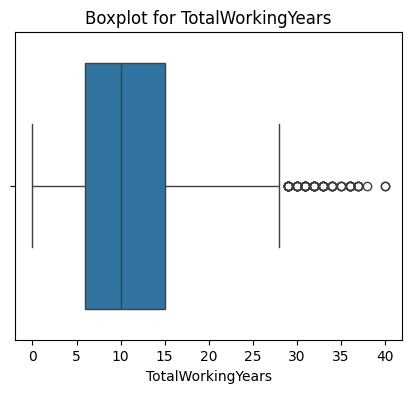

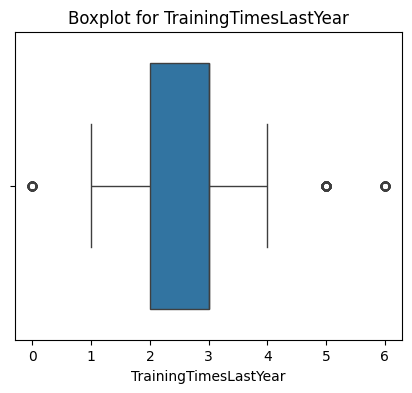

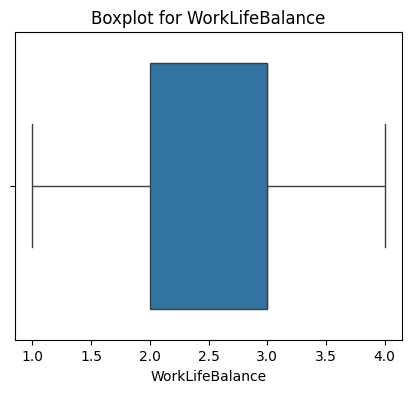

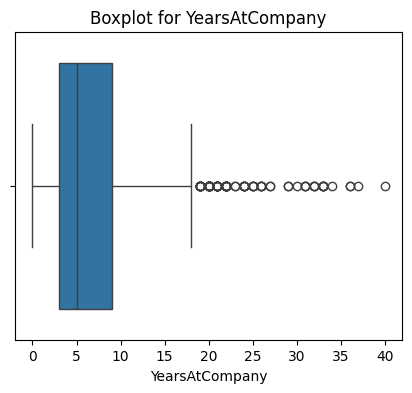

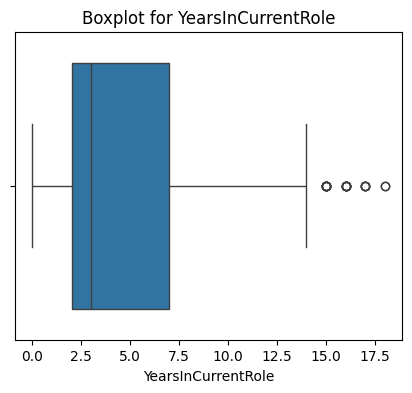

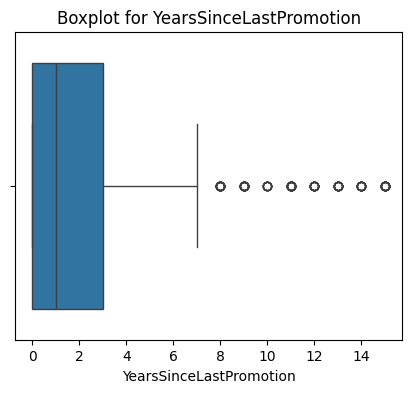

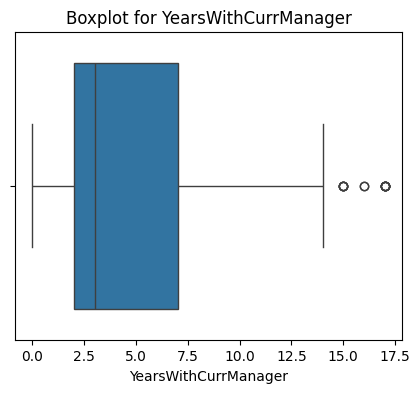

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# select numeric columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

# loop through each numeric column and plot
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


In [ ]:
Q1 = data["Age"].quantile(0.25)
Q3 = data["Age"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered1 = data[(data["Age"]> lower_limit) & (data["Age"] < upper_limit)]
data_filtered1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["DailyRate"].quantile(0.25)
Q3 = data["DailyRate"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered2 = data_filtered1[(data_filtered1["DailyRate"]> lower_limit) & (data_filtered1["DailyRate"] < upper_limit)]
data_filtered2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["Education"].quantile(0.25)
Q3 = data["Education"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered3 = data_filtered2[(data_filtered2["Education"]> lower_limit) & (data_filtered2["Education"] < upper_limit)]
data_filtered3

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["DistanceFromHome"].quantile(0.25)
Q3 = data["DistanceFromHome"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered4 = data_filtered3[(data_filtered3["DistanceFromHome"]> lower_limit) & (data_filtered3["DistanceFromHome"] < upper_limit)]
data_filtered4

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["EmployeeNumber"].quantile(0.25)
Q3 = data["EmployeeNumber"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered5 = data_filtered4[(data_filtered4["EmployeeNumber"]> lower_limit) & (data_filtered4["EmployeeNumber"] < upper_limit)]
data_filtered5

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["EnvironmentSatisfaction"].quantile(0.25)
Q3 = data["EnvironmentSatisfaction"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered6 = data_filtered5[(data_filtered5["EnvironmentSatisfaction"]> lower_limit) & (data_filtered5["EnvironmentSatisfaction"] < upper_limit)]
data_filtered6

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["HourlyRate"].quantile(0.25)
Q3 = data["HourlyRate"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered7 = data_filtered6[(data_filtered6["HourlyRate"]> lower_limit) & (data_filtered6["HourlyRate"] < upper_limit)]
data_filtered7

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["RelationshipSatisfaction"].quantile(0.25)
Q3 = data["RelationshipSatisfaction"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered8 = data_filtered7[(data_filtered7["RelationshipSatisfaction"]> lower_limit) & (data_filtered7["RelationshipSatisfaction"] < upper_limit)]
data_filtered8

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["StockOptionLevel"].quantile(0.25)
Q3 = data["StockOptionLevel"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered9 = data_filtered8[(data_filtered8["StockOptionLevel"]> lower_limit) & (data_filtered8["StockOptionLevel"] < upper_limit)]
data_filtered9

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["TotalWorkingYears"].quantile(0.25)
Q3 = data["TotalWorkingYears"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered10 = data_filtered9[(data_filtered9["TotalWorkingYears"]> lower_limit) & (data_filtered9["TotalWorkingYears"] < upper_limit)]
data_filtered10

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["TrainingTimesLastYear"].quantile(0.25)
Q3 = data["TrainingTimesLastYear"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered11 = data_filtered10[(data_filtered10["TrainingTimesLastYear"]> lower_limit) & (data_filtered10["TrainingTimesLastYear"] < upper_limit)]
data_filtered11

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["WorkLifeBalance"].quantile(0.25)
Q3 = data["WorkLifeBalance"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered12 = data_filtered11[(data_filtered11["WorkLifeBalance"]> lower_limit) & (data_filtered11["WorkLifeBalance"] < upper_limit)]
data_filtered12

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["WorkLifeBalance"].quantile(0.25)
Q3 = data["WorkLifeBalance"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered13 = data_filtered12[(data_filtered12["WorkLifeBalance"]> lower_limit) & (data_filtered12["WorkLifeBalance"] < upper_limit)]
data_filtered13

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["WorkLifeBalance"].quantile(0.25)
Q3 = data["WorkLifeBalance"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered14 = data_filtered13[(data_filtered13["WorkLifeBalance"]> lower_limit) & (data_filtered13["WorkLifeBalance"] < upper_limit)]
data_filtered14

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["YearsAtCompany"].quantile(0.25)
Q3 = data["YearsAtCompany"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered15 = data_filtered14[(data_filtered14["YearsAtCompany"]> lower_limit) & (data_filtered14["YearsAtCompany"] < upper_limit)]
data_filtered15

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["YearsInCurrentRole"].quantile(0.25)
Q3 = data["YearsInCurrentRole"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered16 = data_filtered15[(data_filtered15["YearsInCurrentRole"]> lower_limit) & (data_filtered15["YearsInCurrentRole"] < upper_limit)]
data_filtered16

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["YearsSinceLastPromotion"].quantile(0.25)
Q3 = data["YearsSinceLastPromotion"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered17 = data_filtered16[(data_filtered16["YearsSinceLastPromotion"]> lower_limit) & (data_filtered16["YearsSinceLastPromotion"] < upper_limit)]
data_filtered17

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
Q1 = data["YearsWithCurrManager"].quantile(0.25)
Q3 = data["YearsWithCurrManager"].quantile(0.75)
Q1,Q3

Inter_quartile_range = Q3 - Q1
Inter_quartile_range

lower_limit = Q1 - 1.5*Inter_quartile_range
upper_limit = Q3 + 1.5*Inter_quartile_range
lower_limit,upper_limit

data_filtered18 = data_filtered17[(data_filtered17["YearsWithCurrManager"]> lower_limit) & (data_filtered17["YearsWithCurrManager"] < upper_limit)]
data_filtered18

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


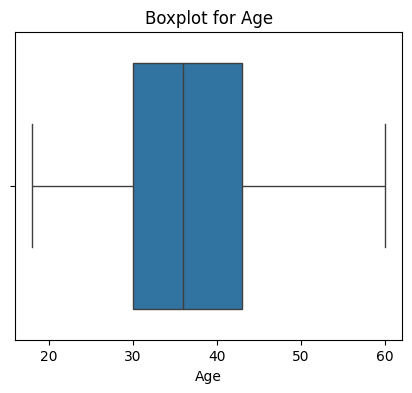

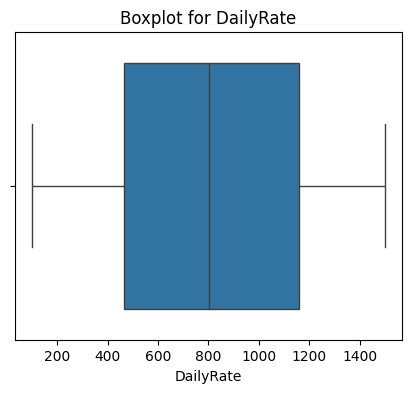

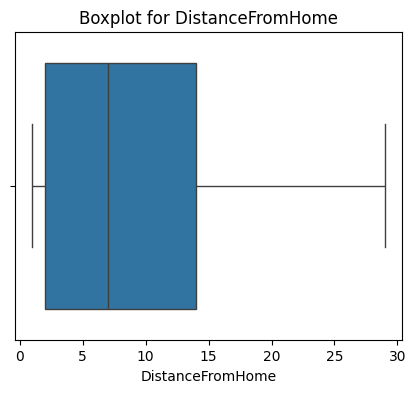

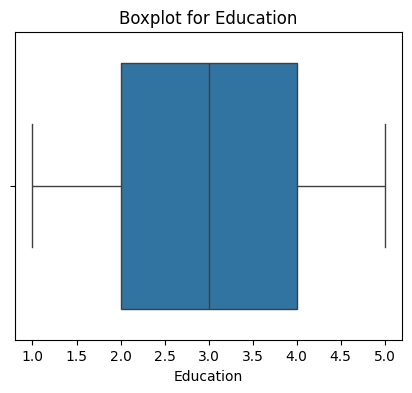

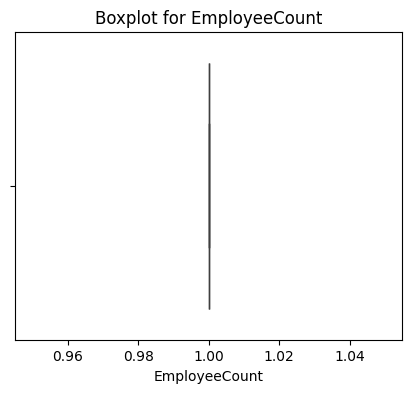

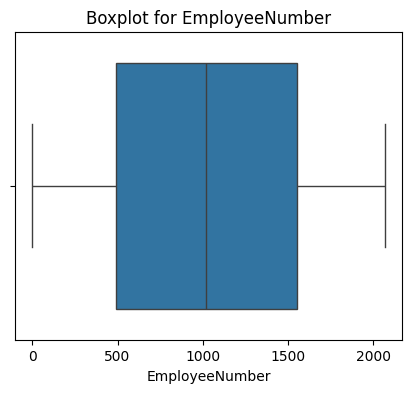

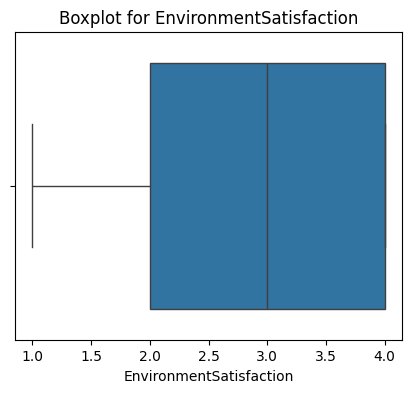

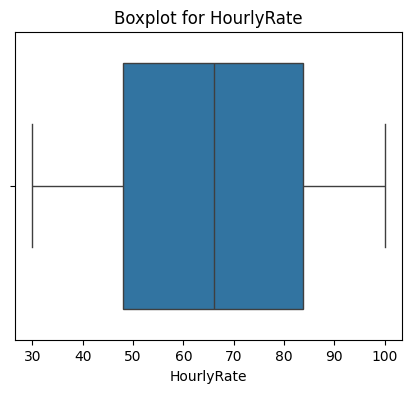

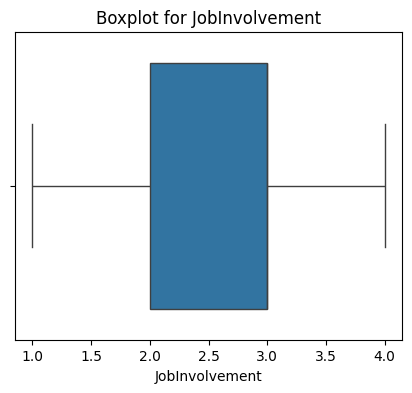

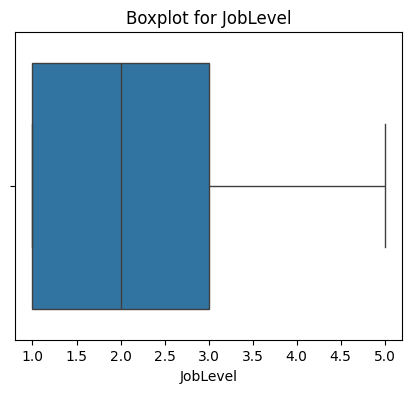

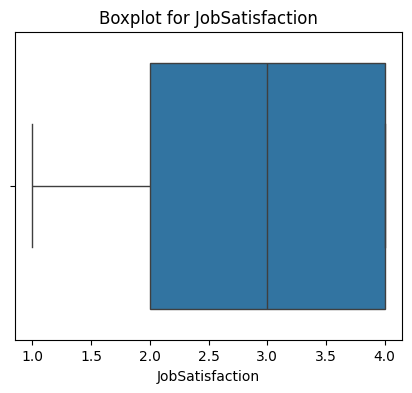

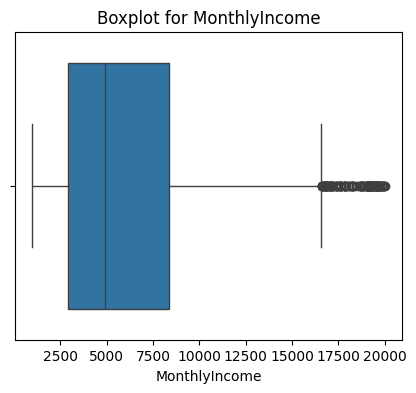

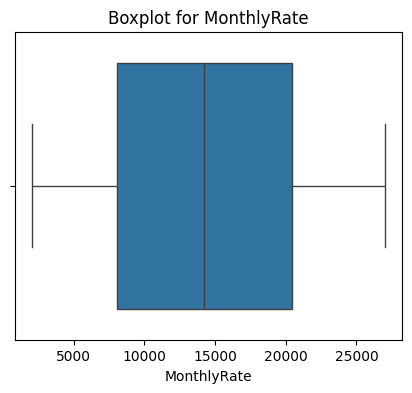

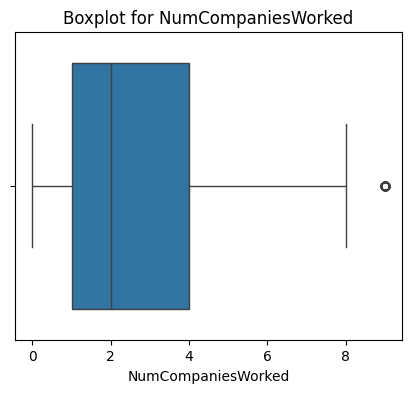

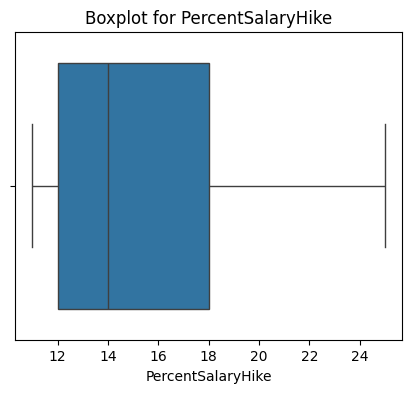

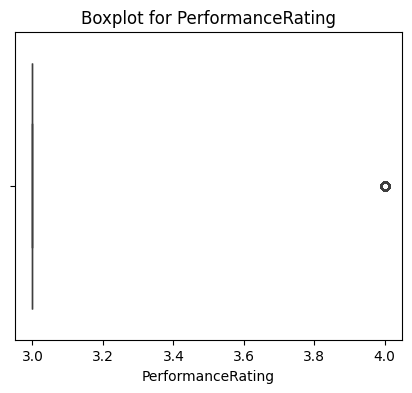

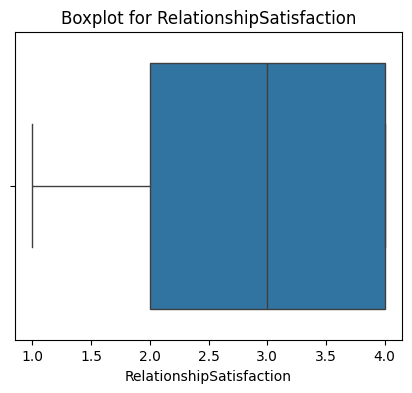

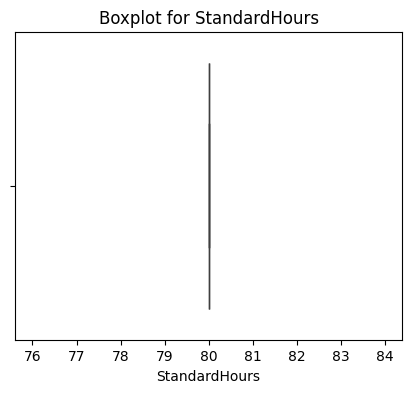

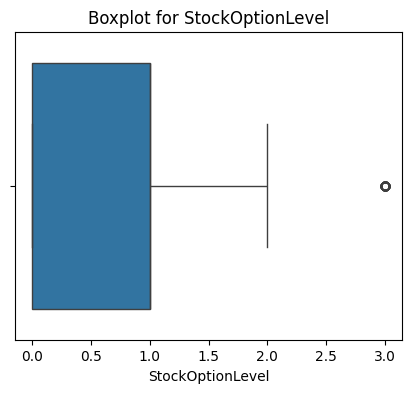

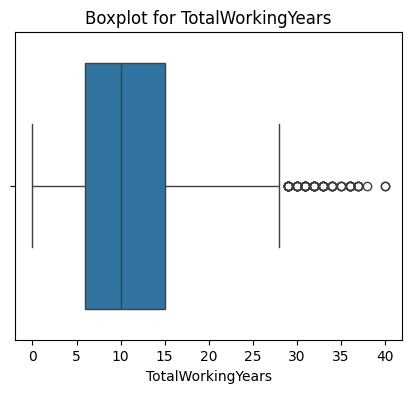

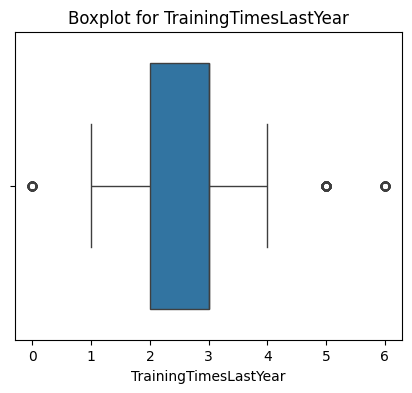

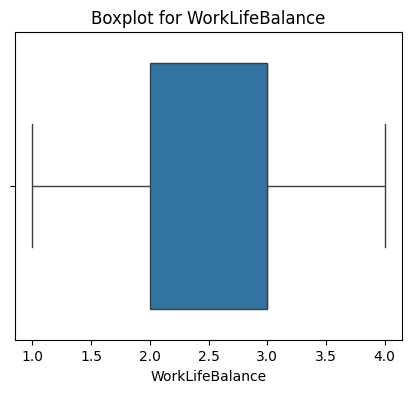

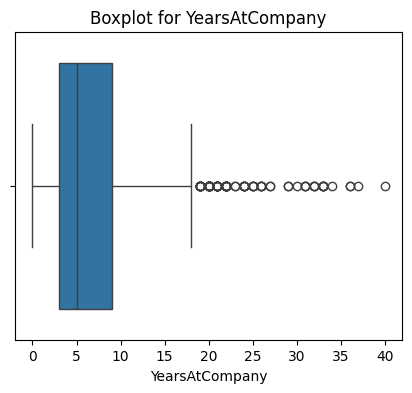

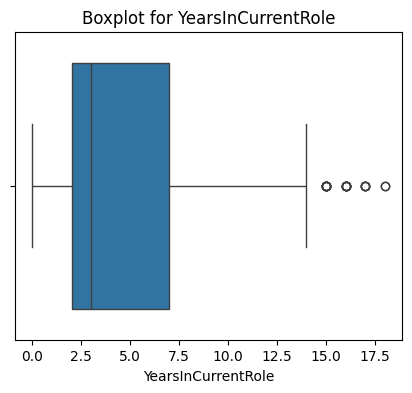

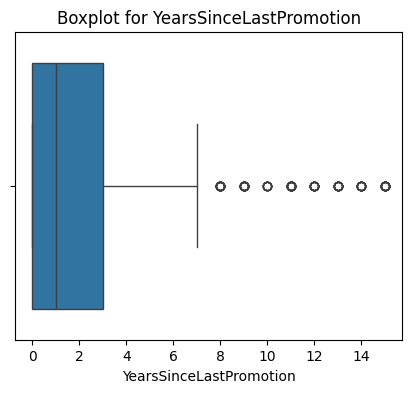

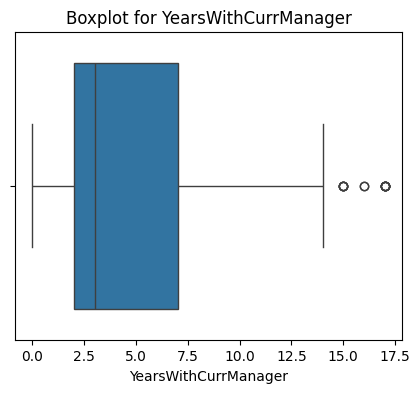

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# select numeric columns
num_cols = data.select_dtypes(include=['int64','float64']).columns

# loop through each numeric column and plot
for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


<Figure size 2200x1800 with 0 Axes>

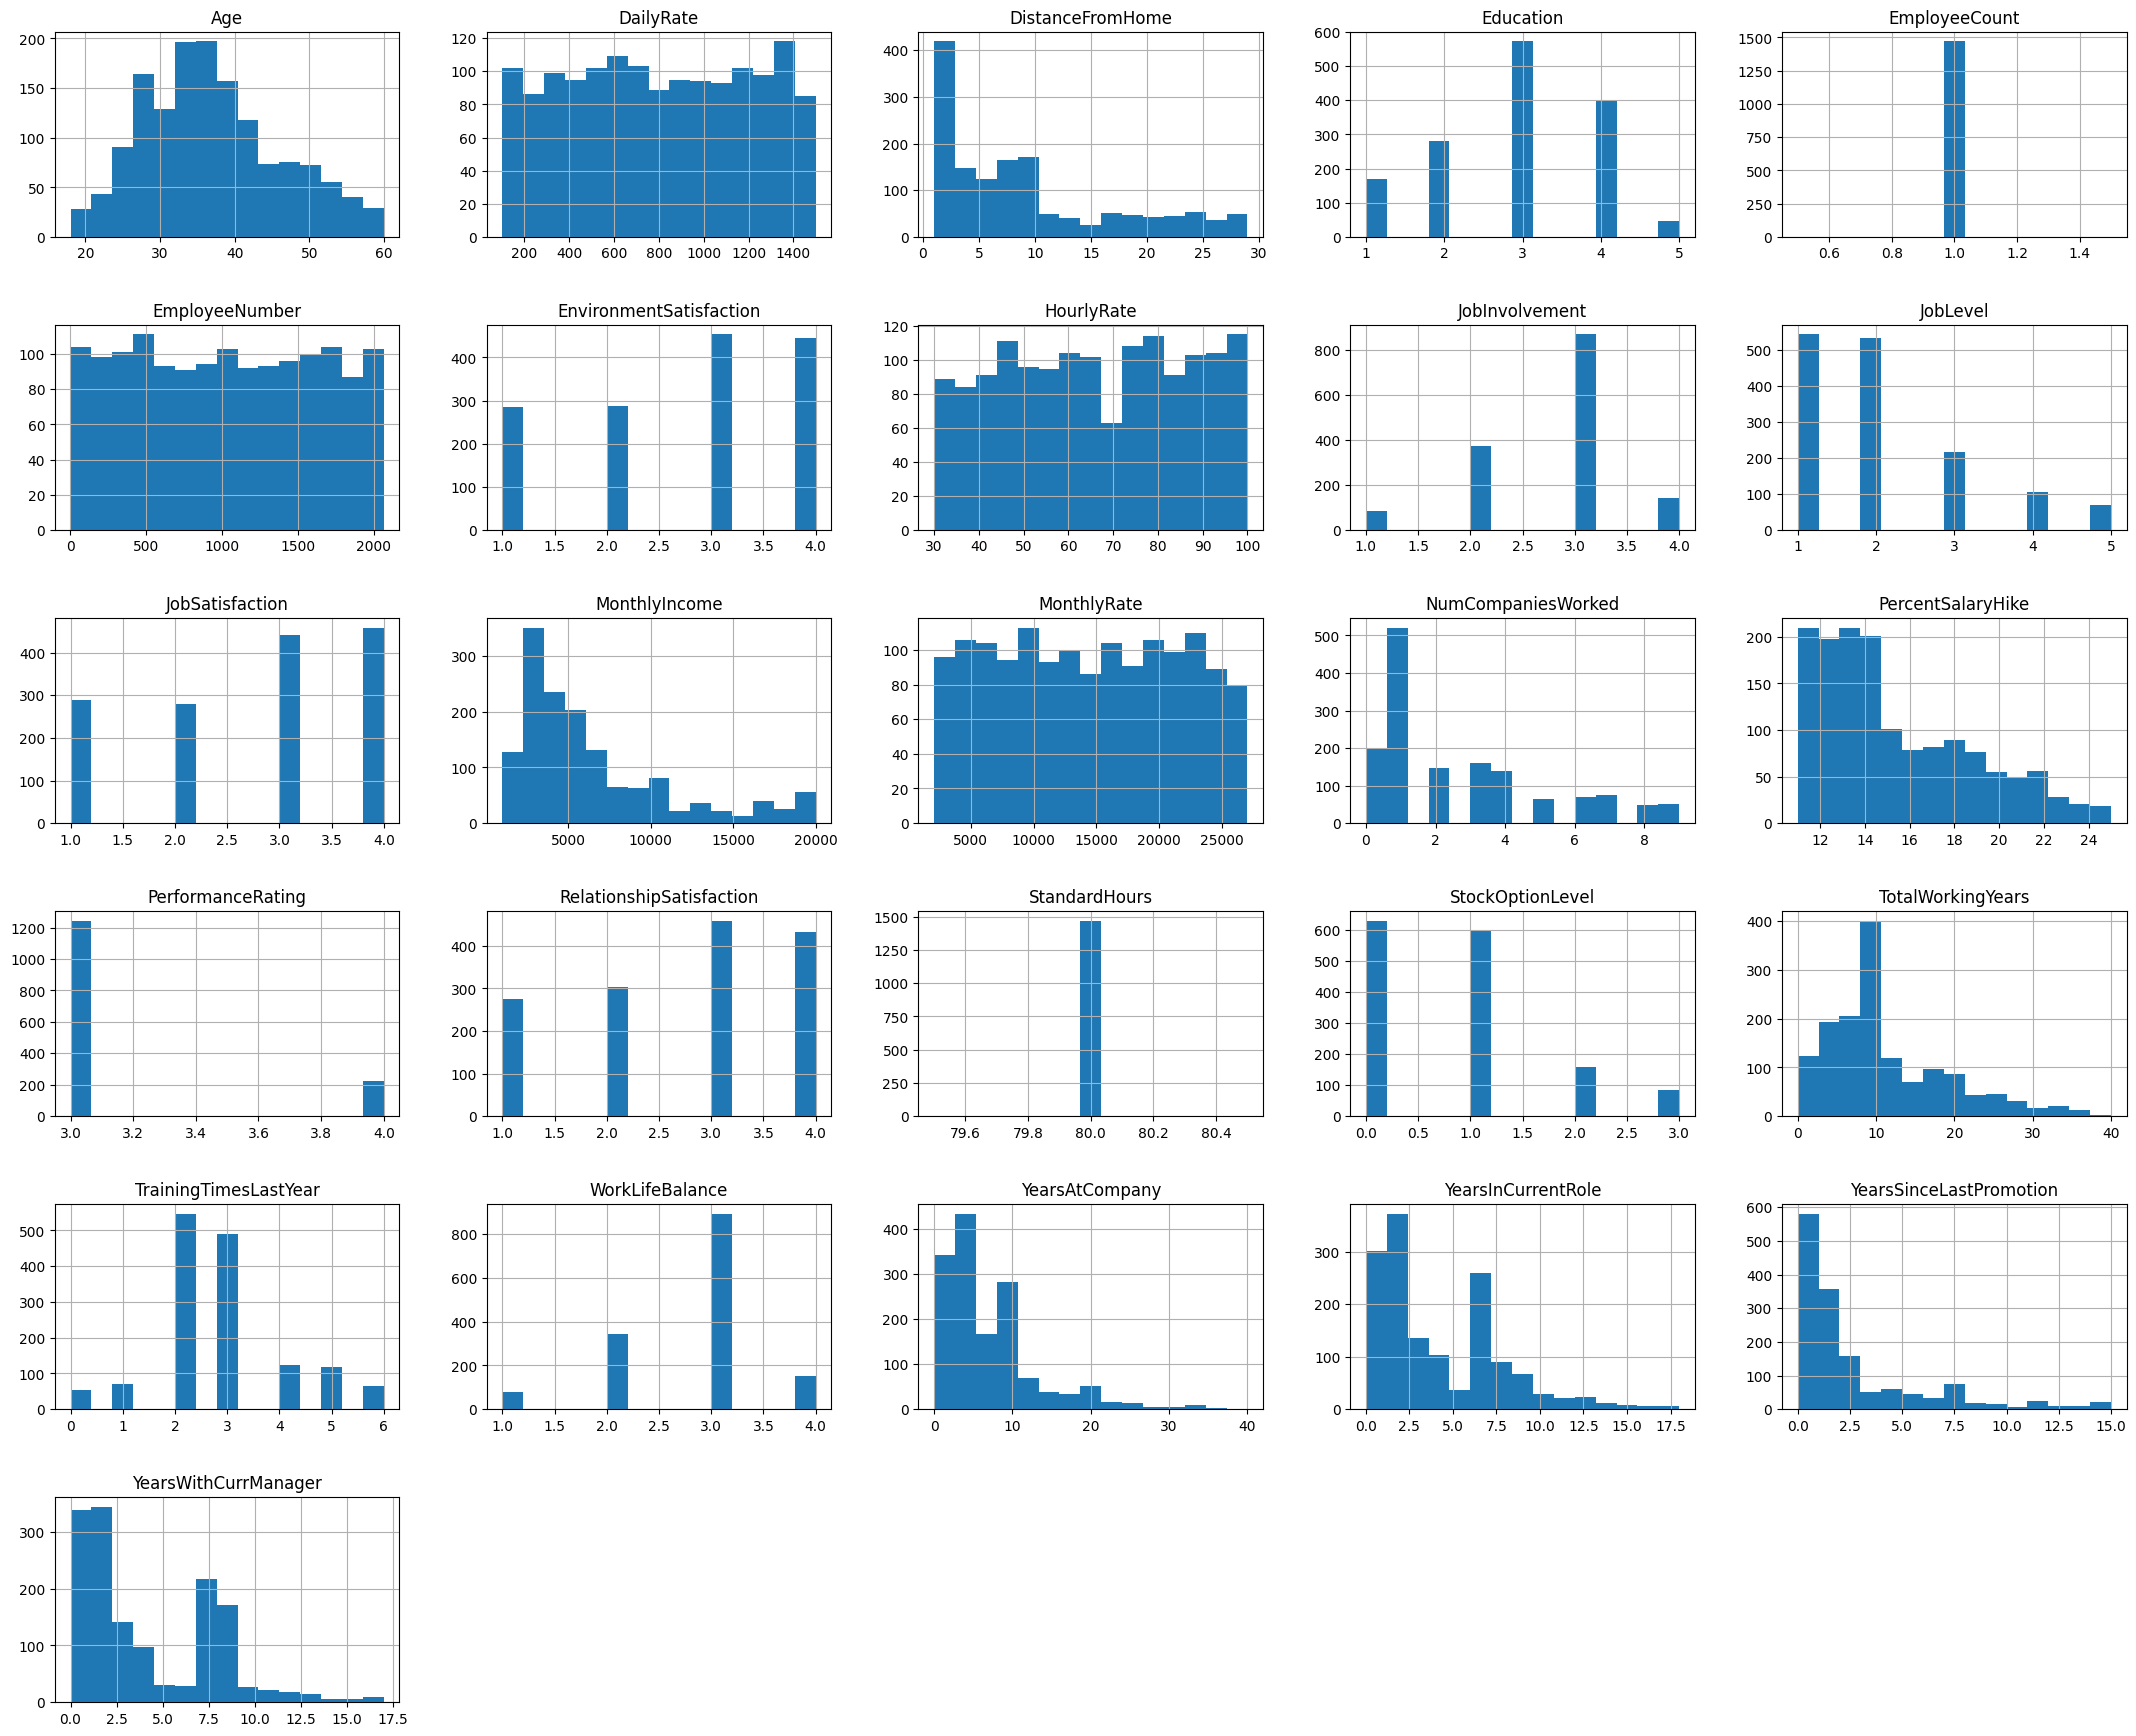

In [ ]:
import matplotlib.pyplot as plt

# Pick only numeric columns
num_cols = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(22, 18))   # ⬅️ Bigger figure size
data[num_cols.columns].hist(bins=15, figsize=(22,18))
plt.tight_layout(pad=3.0)      # ⬅️ Adds spacing between plots
plt.show()


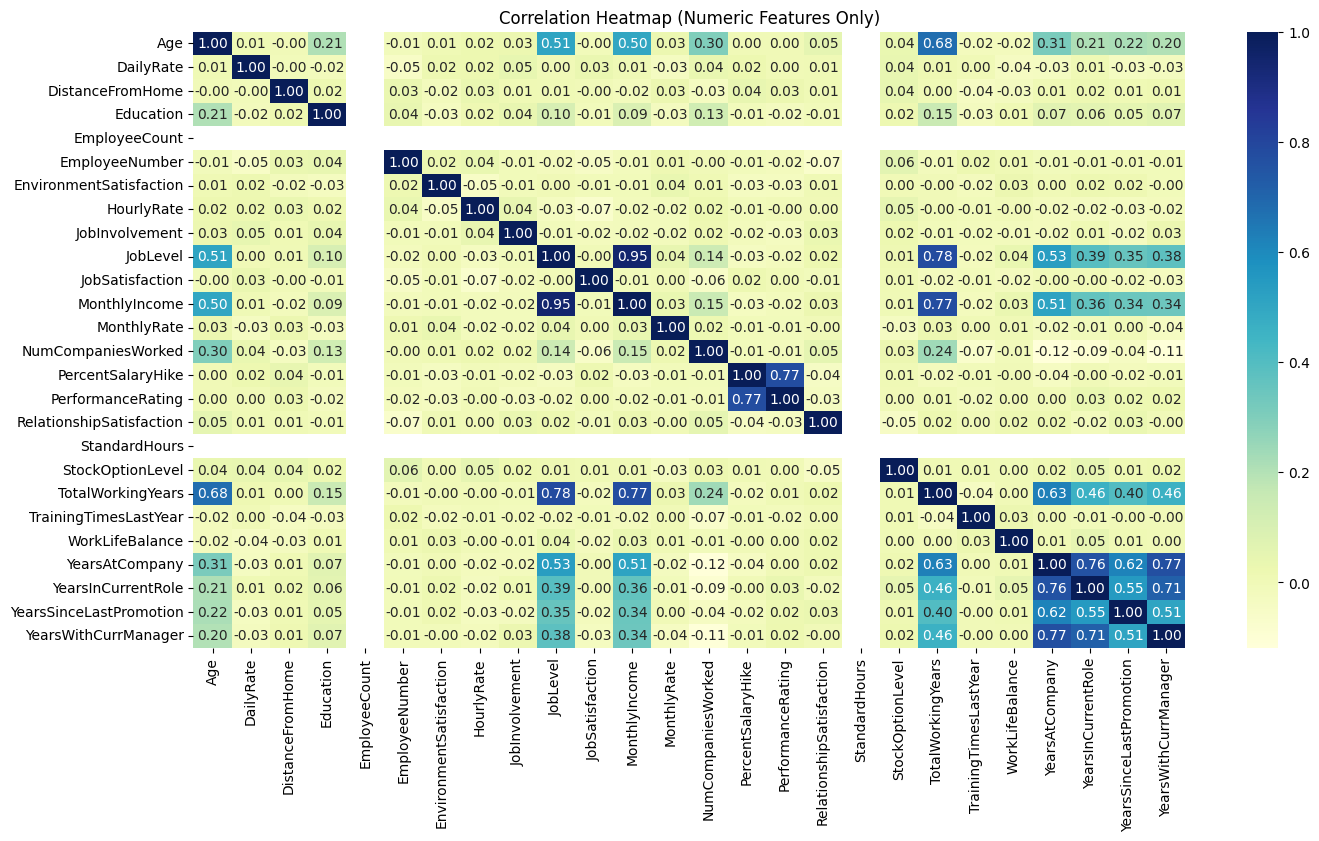

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# select numeric columns only
num_data = data.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(16,8))
sns.heatmap(num_data.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


/tmp/ipython-input-2674680640.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Attrition'] = data['Attrition'].replace({'YES':1,'NO':0})


🔹 Accuracy: 0.8605442176870748
🔹 ROC-AUC: 0.8106641398914636

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294


🧮 Confusion Matrix:
 [[237  10]
 [ 31  16]]


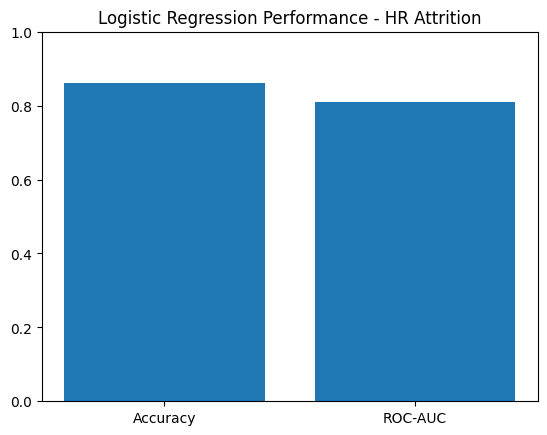

In [ ]:
# ===========================
# 💥 FINAL LOGISTIC FULL PIPELINE (ONE CELL)
# ===========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# 1️⃣ Load fresh data
data = pd.read_csv('/content/HR-Employee-Attrition (1).csv')

# 2️⃣ Clean column names
data.columns = data.columns.str.strip()

# 3️⃣ Clean and encode Attrition
data['Attrition'] = data['Attrition'].astype(str).str.upper().str.strip()
data['Attrition'] = data['Attrition'].replace({'YES':1,'NO':0})
data['Attrition'] = pd.to_numeric(data['Attrition'], errors='coerce')
data = data.dropna(subset=['Attrition'])
data['Attrition'] = data['Attrition'].astype(int)

# 4️⃣ Split X and y
X = data.drop('Attrition', axis=1)
y = data['Attrition']

# 5️⃣ Identify columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(exclude=['object']).columns

# 6️⃣ Preprocessing + Logistic Regression
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg = LogisticRegression(max_iter=500)

pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('model', logreg)])

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 8️⃣ Train and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

# 9️⃣ Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("🔹 Accuracy:", acc)
print("🔹 ROC-AUC:", auc)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔟 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc, auc]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Logistic Regression Performance - HR Attrition")
plt.show()


In [ ]:
data['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


🔹 Accuracy: 0.8775510204081632
🔹 ROC-AUC: 0.8223829463266084

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       370
           1       0.71      0.41      0.52        71

    accuracy                           0.88       441
   macro avg       0.80      0.69      0.72       441
weighted avg       0.86      0.88      0.86       441


🧮 Confusion Matrix:
 [[358  12]
 [ 42  29]]


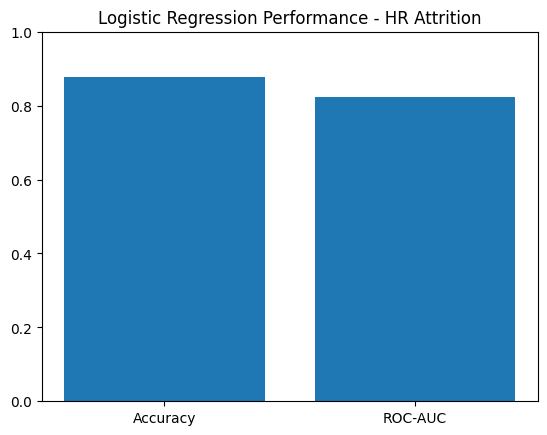

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg = LogisticRegression(max_iter=500)

pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('model', logreg)])

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 8️⃣ Train and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

# 9️⃣ Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("🔹 Accuracy:", acc)
print("🔹 ROC-AUC:", auc)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔟 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc, auc]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Logistic Regression Performance - HR Attrition")
plt.show()


🔹 Accuracy: 0.8758503401360545
🔹 ROC-AUC: 0.8243621223444005

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       493
           1       0.68      0.43      0.53        95

    accuracy                           0.88       588
   macro avg       0.79      0.70      0.73       588
weighted avg       0.86      0.88      0.86       588


🧮 Confusion Matrix:
 [[474  19]
 [ 54  41]]


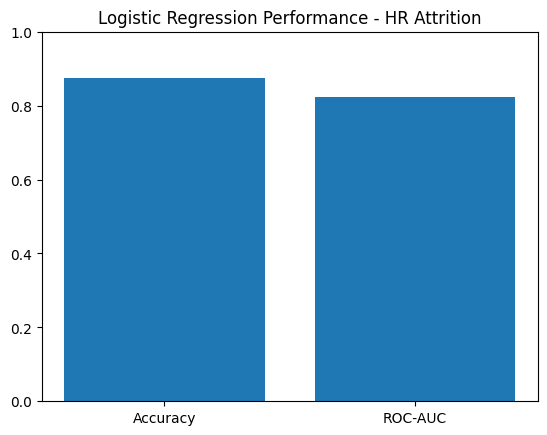

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

logreg = LogisticRegression(max_iter=500)

pipeline = Pipeline(steps=[('preprocess', preprocess),
                           ('model', logreg)])

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)

# 8️⃣ Train and predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:,1]

# 9️⃣ Metrics
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

print("🔹 Accuracy:", acc)
print("🔹 ROC-AUC:", auc)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 🔟 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc, auc]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Logistic Regression Performance - HR Attrition")
plt.show()


🔹 Random Forest Accuracy: 0.8537414965986394
🔹 Random Forest ROC-AUC: 0.7844344904815231

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       247
           1       0.83      0.11      0.19        47

    accuracy                           0.85       294
   macro avg       0.84      0.55      0.55       294
weighted avg       0.85      0.85      0.80       294


🧮 Confusion Matrix:
 [[246   1]
 [ 42   5]]


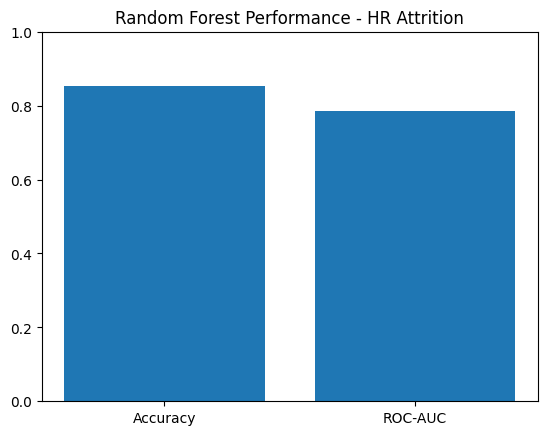

In [ ]:
# 🌳 Random Forest Classifier + Train-Test Split Included

from sklearn.ensemble import RandomForestClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🌳 Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])

# Train and predict
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("🔹 Random Forest Accuracy:", acc_rf)
print("🔹 Random Forest ROC-AUC:", auc_rf)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_rf, auc_rf]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Random Forest Performance - HR Attrition")
plt.show()


🔹 Random Forest Accuracy: 0.8458049886621315
🔹 Random Forest ROC-AUC: 0.7784925770841263

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92       370
           1       0.64      0.10      0.17        71

    accuracy                           0.85       441
   macro avg       0.74      0.54      0.54       441
weighted avg       0.82      0.85      0.80       441


🧮 Confusion Matrix:
 [[366   4]
 [ 64   7]]


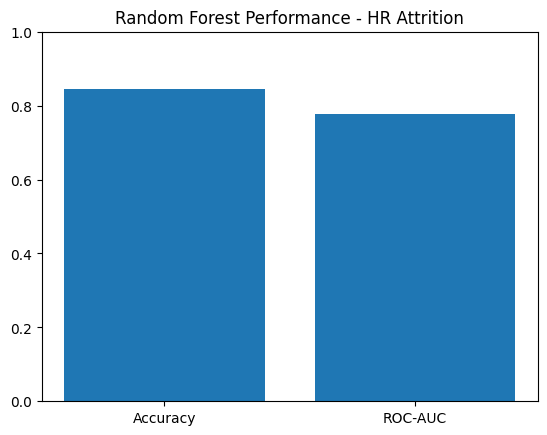

In [ ]:
# 🌳 Random Forest Classifier + Train-Test Split Included

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🌳 Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])

# Train and predict
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("🔹 Random Forest Accuracy:", acc_rf)
print("🔹 Random Forest ROC-AUC:", auc_rf)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_rf, auc_rf]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Random Forest Performance - HR Attrition")
plt.show()


🔹 Random Forest Accuracy: 0.8537414965986394
🔹 Random Forest ROC-AUC: 0.7916728942030533

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       493
           1       0.76      0.14      0.23        95

    accuracy                           0.85       588
   macro avg       0.81      0.56      0.58       588
weighted avg       0.84      0.85      0.81       588


🧮 Confusion Matrix:
 [[489   4]
 [ 82  13]]


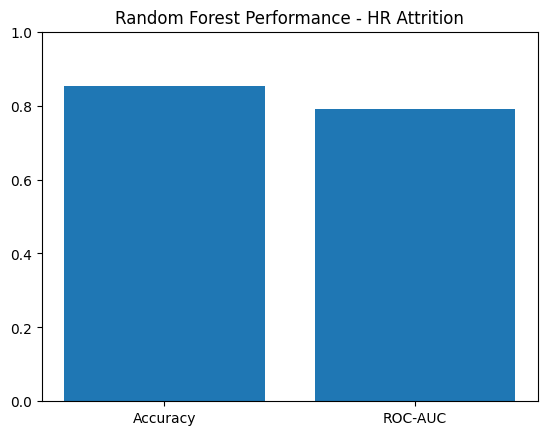

In [ ]:
# 🌳 Random Forest Classifier + Train-Test Split Included

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🌳 Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])

# Train and predict
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

print("🔹 Random Forest Accuracy:", acc_rf)
print("🔹 Random Forest ROC-AUC:", auc_rf)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_rf, auc_rf]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("Random Forest Performance - HR Attrition")
plt.show()


🔹 XGBoost Accuracy: 0.8639455782312925
🔹 XGBoost ROC-AUC: 0.7931777069515031

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       247
           1       0.77      0.21      0.33        47

    accuracy                           0.86       294
   macro avg       0.82      0.60      0.63       294
weighted avg       0.85      0.86      0.83       294


🧮 Confusion Matrix:
 [[244   3]
 [ 37  10]]


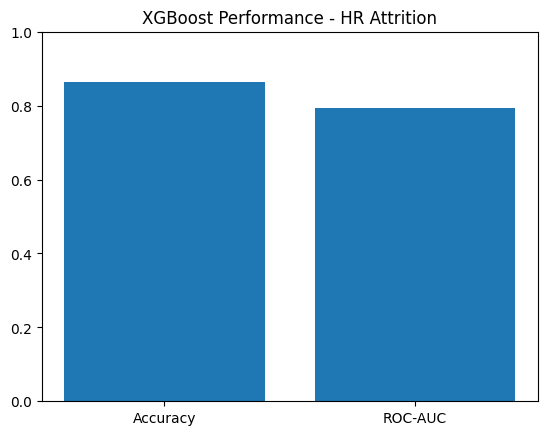

In [ ]:
# 💥 XGBoost Classifier + Train-Test Split Included
from xgboost import XGBClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,        # ← your test size here
    random_state=42,
    stratify=y
)

# ⚡ XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', xgb_model)
])

# Train & Predict
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("🔹 XGBoost Accuracy:", acc_xgb)
print("🔹 XGBoost ROC-AUC:", auc_xgb)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_xgb, auc_xgb]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("XGBoost Performance - HR Attrition")
plt.show()


🔹 XGBoost Accuracy: 0.854875283446712
🔹 XGBoost ROC-AUC: 0.7646364674533688

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       370
           1       0.64      0.23      0.33        71

    accuracy                           0.85       441
   macro avg       0.75      0.60      0.63       441
weighted avg       0.83      0.85      0.82       441


🧮 Confusion Matrix:
 [[361   9]
 [ 55  16]]


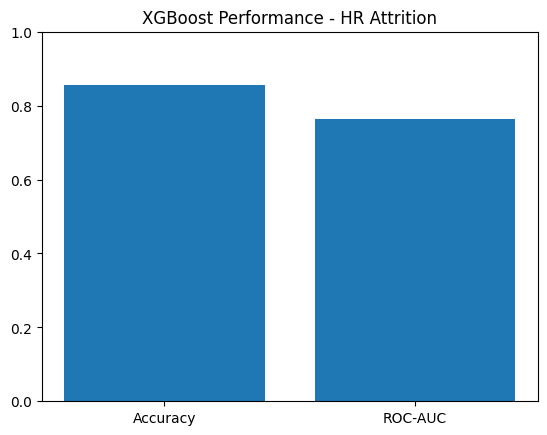

In [ ]:
# 💥 XGBoost Classifier + Train-Test Split Included
from xgboost import XGBClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,        # ← your test size here
    random_state=42,
    stratify=y
)

# ⚡ XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', xgb_model)
])

# Train & Predict
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("🔹 XGBoost Accuracy:", acc_xgb)
print("🔹 XGBoost ROC-AUC:", auc_xgb)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_xgb, auc_xgb]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("XGBoost Performance - HR Attrition")
plt.show()


🔹 XGBoost Accuracy: 0.8673469387755102
🔹 XGBoost ROC-AUC: 0.8004483826198355

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       493
           1       0.73      0.28      0.41        95

    accuracy                           0.87       588
   macro avg       0.80      0.63      0.67       588
weighted avg       0.85      0.87      0.84       588


🧮 Confusion Matrix:
 [[483  10]
 [ 68  27]]


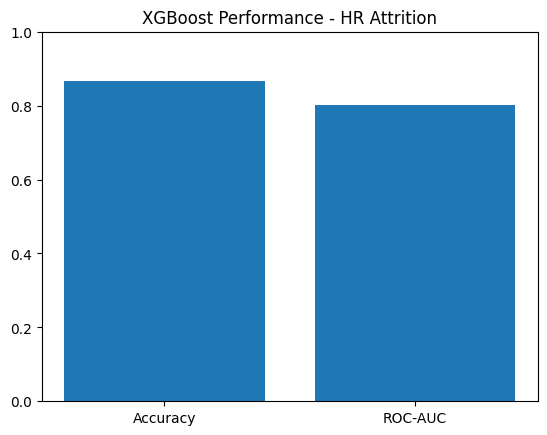

In [ ]:
# 💥 XGBoost Classifier + Train-Test Split Included
from xgboost import XGBClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,        # ← your test size here
    random_state=42,
    stratify=y
)

# ⚡ XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

# Pipeline
pipeline_xgb = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', xgb_model)
])

# Train & Predict
pipeline_xgb.fit(X_train, y_train)
y_pred_xgb = pipeline_xgb.predict(X_test)
y_prob_xgb = pipeline_xgb.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("🔹 XGBoost Accuracy:", acc_xgb)
print("🔹 XGBoost ROC-AUC:", auc_xgb)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_xgb, auc_xgb]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("XGBoost Performance - HR Attrition")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00
🔹 CatBoost Accuracy: 0.8571428571428571
🔹 CatBoost ROC-AUC: 0.7926608665690412

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.61      0.30      0.40        47

    accuracy                           0.86       294
   macro avg       0.74      0.63      0.66       294
weighted avg       0.84      0.86      0.84       294


🧮 Confusion Matrix:
 [[238   9]
 [ 33  14]]


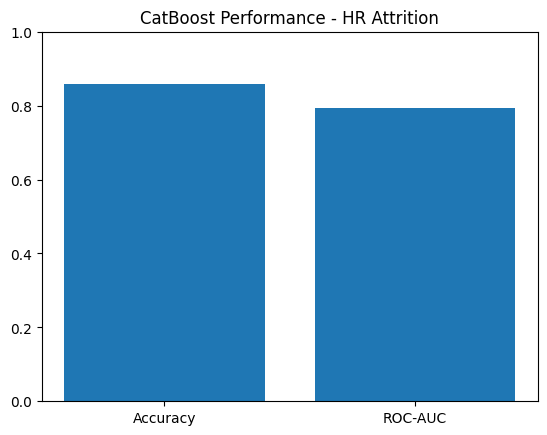

In [ ]:
# 🐱 CatBoost Classifier + Train-Test Split Included

!pip install catboost

from catboost import CatBoostClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🐱 CatBoost Model
cat_model = CatBoostClassifier(
    iterations=300,          # n_estimators
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False,           # turn off training logs
    random_state=42,
    class_weights=[1, 3]     # handles imbalance (adjust if needed)
)

# Pipeline (CatBoost can handle cats, but keeping consistent)
pipeline_cat = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', cat_model)
])

# Train & Predict
pipeline_cat.fit(X_train, y_train)
y_pred_cat = pipeline_cat.predict(X_test)
y_prob_cat = pipeline_cat.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_prob_cat)

print("🔹 CatBoost Accuracy:", acc_cat)
print("🔹 CatBoost ROC-AUC:", auc_cat)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_cat))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_cat, auc_cat]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("CatBoost Performance - HR Attrition")
plt.show()


🔹 CatBoost Accuracy: 0.854875283446712
🔹 CatBoost ROC-AUC: 0.7596117244004568

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.61      0.28      0.38        71

    accuracy                           0.85       441
   macro avg       0.74      0.62      0.65       441
weighted avg       0.83      0.85      0.83       441


🧮 Confusion Matrix:
 [[357  13]
 [ 51  20]]


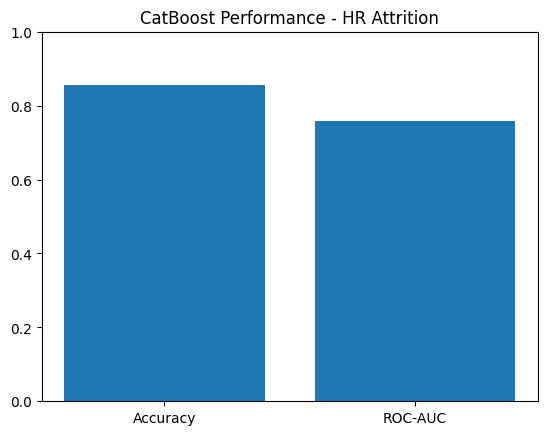

In [ ]:
# 🐱 CatBoost Classifier + Train-Test Split Included
from catboost import CatBoostClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🐱 CatBoost Model
cat_model = CatBoostClassifier(
    iterations=300,          # n_estimators
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False,           # turn off training logs
    random_state=42,
    class_weights=[1, 3]     # handles imbalance (adjust if needed)
)

# Pipeline (CatBoost can handle cats, but keeping consistent)
pipeline_cat = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', cat_model)
])

# Train & Predict
pipeline_cat.fit(X_train, y_train)
y_pred_cat = pipeline_cat.predict(X_test)
y_prob_cat = pipeline_cat.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_prob_cat)

print("🔹 CatBoost Accuracy:", acc_cat)
print("🔹 CatBoost ROC-AUC:", auc_cat)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_cat))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_cat, auc_cat]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("CatBoost Performance - HR Attrition")
plt.show()


🔹 CatBoost Accuracy: 0.8724489795918368
🔹 CatBoost ROC-AUC: 0.8040781466851714

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       493
           1       0.74      0.33      0.45        95

    accuracy                           0.87       588
   macro avg       0.81      0.65      0.69       588
weighted avg       0.86      0.87      0.85       588


🧮 Confusion Matrix:
 [[482  11]
 [ 64  31]]


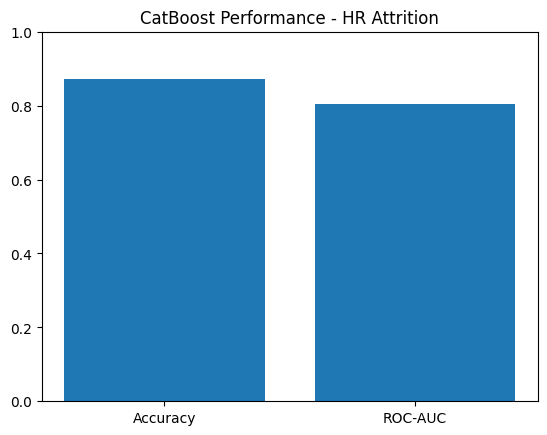

In [ ]:
# 🐱 CatBoost Classifier + Train-Test Split Included
from catboost import CatBoostClassifier

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🐱 CatBoost Model
cat_model = CatBoostClassifier(
    iterations=300,          # n_estimators
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=False,           # turn off training logs
    random_state=42,
    class_weights=[1, 3]     # handles imbalance (adjust if needed)
)

# Pipeline (CatBoost can handle cats, but keeping consistent)
pipeline_cat = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', cat_model)
])

# Train & Predict
pipeline_cat.fit(X_train, y_train)
y_pred_cat = pipeline_cat.predict(X_test)
y_prob_cat = pipeline_cat.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_cat = accuracy_score(y_test, y_pred_cat)
auc_cat = roc_auc_score(y_test, y_prob_cat)

print("🔹 CatBoost Accuracy:", acc_cat)
print("🔹 CatBoost ROC-AUC:", auc_cat)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_cat))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_cat, auc_cat]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("CatBoost Performance - HR Attrition")
plt.show()


🔹 SVM Accuracy: 0.8197278911564626
🔹 SVM ROC-AUC: 0.8061848565767938

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       247
           1       0.45      0.60      0.51        47

    accuracy                           0.82       294
   macro avg       0.68      0.73      0.70       294
weighted avg       0.84      0.82      0.83       294


🧮 Confusion Matrix:
 [[213  34]
 [ 19  28]]


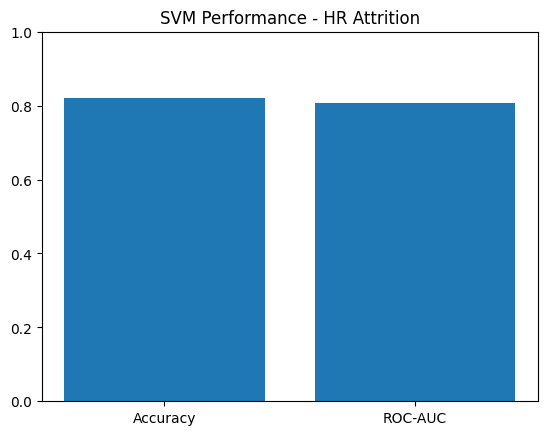

In [ ]:
# 🛡 SVM Classifier + Train-Test Split Included
from sklearn.svm import SVC

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🛡 SVM Model
svm_model = SVC(
    kernel='rbf',           # rbf works best for non-linear patterns
    probability=True,       # needed for ROC-AUC + predict_proba
    C=1,                    # regularization strength
    gamma='scale',          # auto kernel width
    class_weight='balanced' # handles imbalance better
)

# Pipeline
pipeline_svm = Pipeline(steps=[
    ('preprocess', preprocess),  # scaling is VERY important for SVM
    ('model', svm_model)
])

# Train & Predict
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_prob_svm = pipeline_svm.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("🔹 SVM Accuracy:", acc_svm)
print("🔹 SVM ROC-AUC:", auc_svm)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_svm, auc_svm]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("SVM Performance - HR Attrition")
plt.show()


🔹 SVM Accuracy: 0.8367346938775511
🔹 SVM ROC-AUC: 0.8072135515797487

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90       370
           1       0.49      0.61      0.54        71

    accuracy                           0.84       441
   macro avg       0.71      0.74      0.72       441
weighted avg       0.85      0.84      0.84       441


🧮 Confusion Matrix:
 [[326  44]
 [ 28  43]]


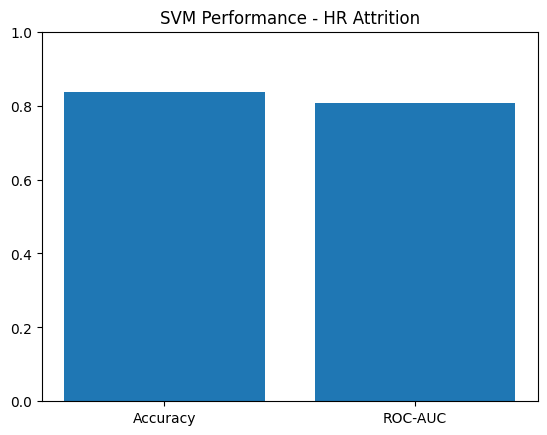

In [ ]:
# 🛡 SVM Classifier + Train-Test Split Included
from sklearn.svm import SVC

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🛡 SVM Model
svm_model = SVC(
    kernel='rbf',           # rbf works best for non-linear patterns
    probability=True,       # needed for ROC-AUC + predict_proba
    C=1,                    # regularization strength
    gamma='scale',          # auto kernel width
    class_weight='balanced' # handles imbalance better
)

# Pipeline
pipeline_svm = Pipeline(steps=[
    ('preprocess', preprocess),  # scaling is VERY important for SVM
    ('model', svm_model)
])

# Train & Predict
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_prob_svm = pipeline_svm.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("🔹 SVM Accuracy:", acc_svm)
print("🔹 SVM ROC-AUC:", auc_svm)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_svm, auc_svm]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("SVM Performance - HR Attrition")
plt.show()


🔹 SVM Accuracy: 0.8384353741496599
🔹 SVM ROC-AUC: 0.8152663606277357

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       493
           1       0.50      0.65      0.57        95

    accuracy                           0.84       588
   macro avg       0.71      0.76      0.73       588
weighted avg       0.86      0.84      0.85       588


🧮 Confusion Matrix:
 [[431  62]
 [ 33  62]]


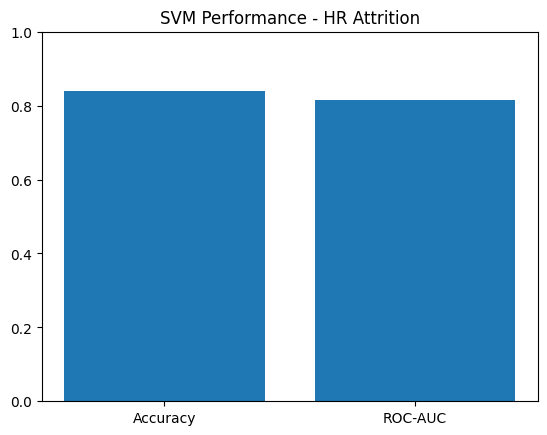

In [ ]:
# 🛡 SVM Classifier + Train-Test Split Included
from sklearn.svm import SVC

# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.40,        # ← your test size here
    random_state=42,
    stratify=y
)

# 🛡 SVM Model
svm_model = SVC(
    kernel='rbf',           # rbf works best for non-linear patterns
    probability=True,       # needed for ROC-AUC + predict_proba
    C=1,                    # regularization strength
    gamma='scale',          # auto kernel width
    class_weight='balanced' # handles imbalance better
)

# Pipeline
pipeline_svm = Pipeline(steps=[
    ('preprocess', preprocess),  # scaling is VERY important for SVM
    ('model', svm_model)
])

# Train & Predict
pipeline_svm.fit(X_train, y_train)
y_pred_svm = pipeline_svm.predict(X_test)
y_prob_svm = pipeline_svm.predict_proba(X_test)[:,1]

# 📊 Metrics
acc_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

print("🔹 SVM Accuracy:", acc_svm)
print("🔹 SVM ROC-AUC:", auc_svm)
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# 📈 Bar Plot
metrics = ['Accuracy','ROC-AUC']
values = [acc_svm, auc_svm]

plt.bar(metrics, values)
plt.ylim(0,1)
plt.title("SVM Performance - HR Attrition")
plt.show()


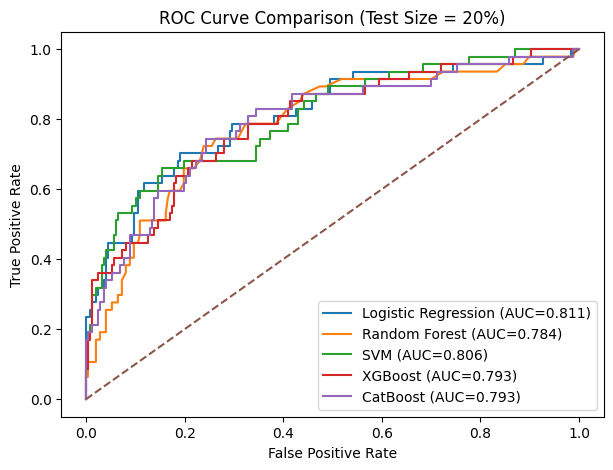

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 2️⃣ Pipelines
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]   # adjust if needed
    )
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 3️⃣ ROC Curve Plot
plt.figure(figsize=(7,5))

for name, pipe in pipelines.items():
    y_prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Size = 20%)")
plt.legend()
plt.show()


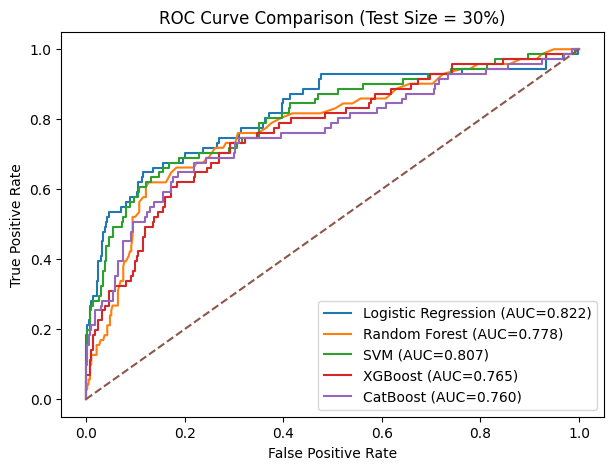

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 2️⃣ Pipelines
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]   # adjust if needed
    )
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 3️⃣ ROC Curve Plot
plt.figure(figsize=(7,5))

for name, pipe in pipelines.items():
    y_prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Size = 30%)")
plt.legend()
plt.show()


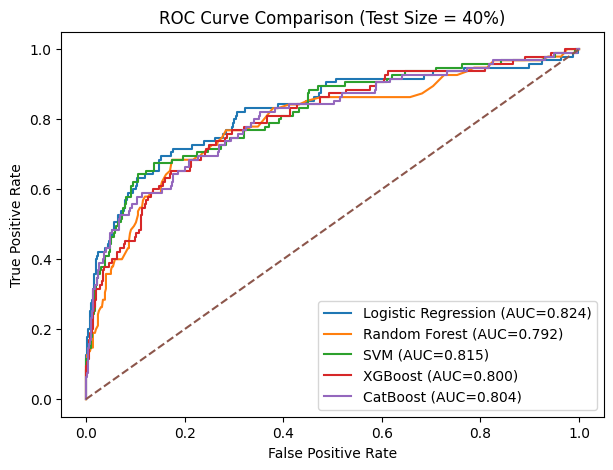

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.40,
    random_state=42,
    stratify=y
)

# 2️⃣ Pipelines
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]   # adjust if needed
    )
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 3️⃣ ROC Curve Plot
plt.figure(figsize=(7,5))

for name, pipe in pipelines.items():
    y_prob = pipe.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Test Size = 40%)")
plt.legend()
plt.show()


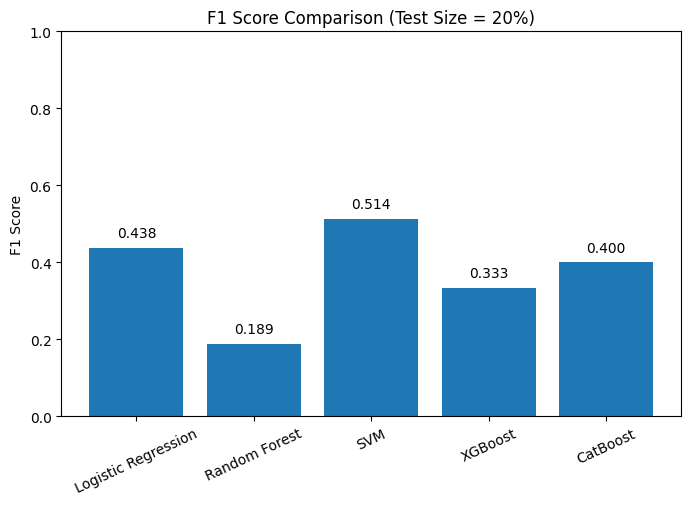

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.metrics import f1_score

# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# 2️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]
    )
}

# 3️⃣ Fit all models using pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 4️⃣ Calculate F1 Scores
f1_scores = {}
for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

# 5️⃣ Bar Plot with Labels
plt.figure(figsize=(8,5))
bars = plt.bar(f1_scores.keys(), f1_scores.values())
plt.xticks(rotation=25)
plt.ylim(0,1)
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison (Test Size = 20%)")

# 🔢 Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f"{height:.3f}",
        ha='center',
        va='bottom'
    )

plt.show()


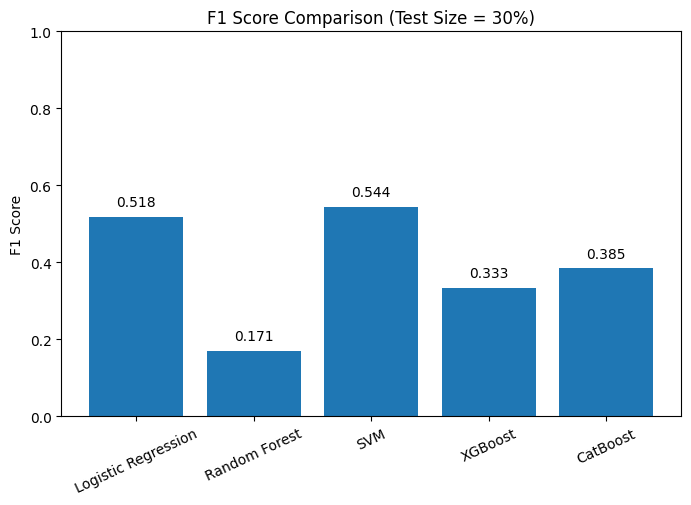

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.metrics import f1_score

# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# 2️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]
    )
}

# 3️⃣ Fit all models using pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 4️⃣ Calculate F1 Scores
f1_scores = {}
for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

# 5️⃣ Bar Plot with Labels
plt.figure(figsize=(8,5))
bars = plt.bar(f1_scores.keys(), f1_scores.values())
plt.xticks(rotation=25)
plt.ylim(0,1)
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison (Test Size = 30%)")

# 🔢 Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f"{height:.3f}",
        ha='center',
        va='bottom'
    )

plt.show()


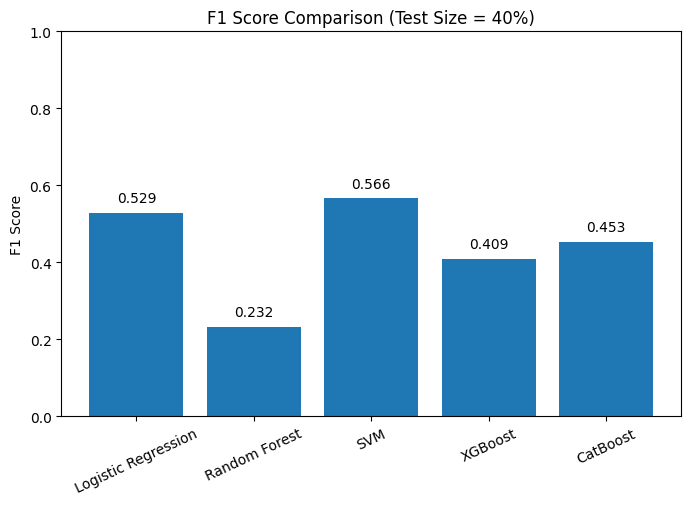

In [ ]:
# 📌 REQUIRED IMPORTS
from sklearn.metrics import f1_score

# 1️⃣ Train-test split (20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.40,
    random_state=42,
    stratify=y
)

# 2️⃣ Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]
    )
}

# 3️⃣ Fit all models using pipelines
pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[
        ('preprocess', preprocess),
        ('model', model)
    ])
    pipelines[name].fit(X_train, y_train)

# 4️⃣ Calculate F1 Scores
f1_scores = {}
for name, pipe in pipelines.items():
    y_pred = pipe.predict(X_test)
    f1_scores[name] = f1_score(y_test, y_pred)

# 5️⃣ Bar Plot with Labels
plt.figure(figsize=(8,5))
bars = plt.bar(f1_scores.keys(), f1_scores.values())
plt.xticks(rotation=25)
plt.ylim(0,1)
plt.ylabel("F1 Score")
plt.title("F1 Score Comparison (Test Size = 40%)")

# 🔢 Add values above bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.02,
        f"{height:.3f}",
        ha='center',
        va='bottom'
    )

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
import pandas as pd

test_sizes = [0.20, 0.30, 0.40]

models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    ),
    "CatBoost": CatBoostClassifier(
        iterations=300,
        learning_rate=0.05,
        depth=6,
        verbose=False,
        random_state=42,
        class_weights=[1,3]
    )
}

results = []

for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=ts,
        random_state=42,
        stratify=y
    )

    for name, model in models.items():
        pipe = Pipeline(steps=[('preprocess', preprocess), ('model', model)])
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        y_prob = pipe.predict_proba(X_test)[:,1]

        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results.append({
            "Test Size": ts,
            "Model": name,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "AUC": auc
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.set_index(["Test Size", "Model"])
print(results_df)


                               Precision    Recall  F1 Score       AUC
Test Size Model                                                       
0.2       Logistic Regression   0.615385  0.340426  0.438356  0.810664
          Random Forest         0.833333  0.106383  0.188679  0.784434
          SVM                   0.451613  0.595745  0.513761  0.806185
          XGBoost               0.769231  0.212766  0.333333  0.793178
          CatBoost              0.608696  0.297872  0.400000  0.792661
0.3       Logistic Regression   0.707317  0.408451  0.517857  0.822383
          Random Forest         0.636364  0.098592  0.170732  0.778493
          SVM                   0.494253  0.605634  0.544304  0.807195
          XGBoost               0.640000  0.225352  0.333333  0.764636
          CatBoost              0.606061  0.281690  0.384615  0.759612
0.4       Logistic Regression   0.683333  0.431579  0.529032  0.824362
          Random Forest         0.764706  0.136842  0.232143  0.791673
      

                 Feature  Importance
11         MonthlyIncome    0.068076
0                    Age    0.061446
19     TotalWorkingYears    0.049397
1              DailyRate    0.048412
22        YearsAtCompany    0.042386
2       DistanceFromHome    0.040888
5         EmployeeNumber    0.040520
7             HourlyRate    0.038925
12           MonthlyRate    0.038832
25  YearsWithCurrManager    0.034891
13    NumCompaniesWorked    0.032990
23    YearsInCurrentRole    0.031198
54          OverTime_Yes    0.030953
14     PercentSalaryHike    0.029803
18      StockOptionLevel    0.029438


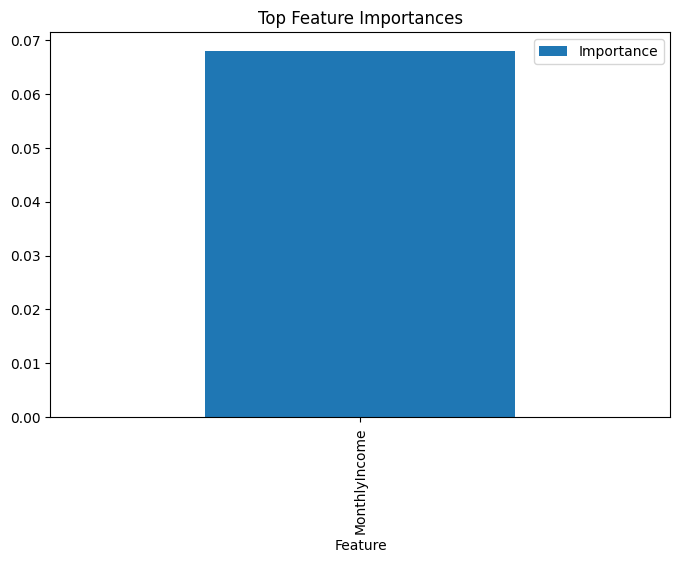

In [ ]:
# 🌲 Random Forest Feature Importance

from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Train-test split (use whichever test_size you want)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

# Build Random Forest pipeline
rf_model = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)

pipeline_rf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', rf_model)
])

# Fit model
pipeline_rf.fit(X_train, y_train)

# 🔑 Extract feature names from the preprocessor
ohe = pipeline_rf.named_steps['preprocess'].named_transformers_['cat']
cat_feature_names = list(ohe.get_feature_names_out(cat_cols))
num_feature_names = list(num_cols)
all_features = num_feature_names + cat_feature_names

# 🔥 Get feature importance scores
importances = pipeline_rf.named_steps['model'].feature_importances_

# Create dataframe
feat_imp_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
})

# Sort descending
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df.head(15))   # top 15 features

# 📊 Optional: Plot top 15
feat_imp_df.head(15).plot(kind='bar', x='Feature', figsize=(8,5), title='Top Feature Importances')
plt.show()


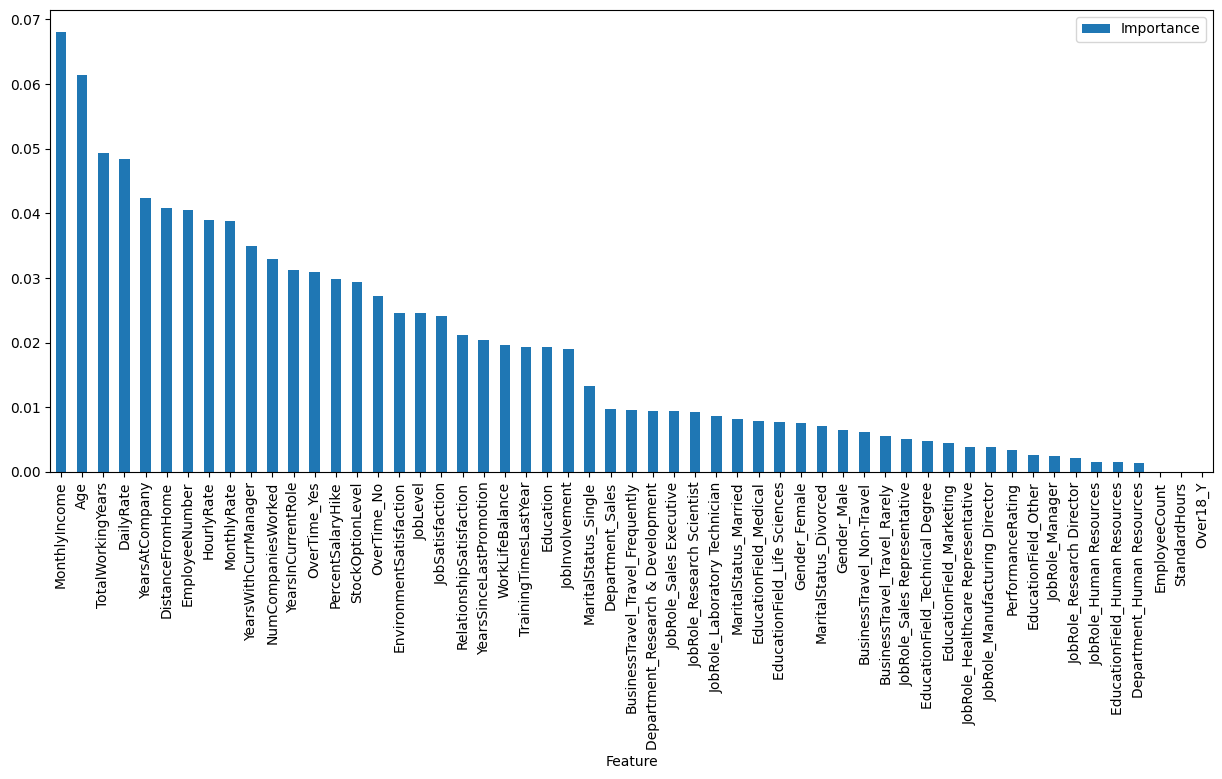

In [ ]:
feat_imp_df.plot(kind='bar', x='Feature', figsize=(15,6))
plt.show()


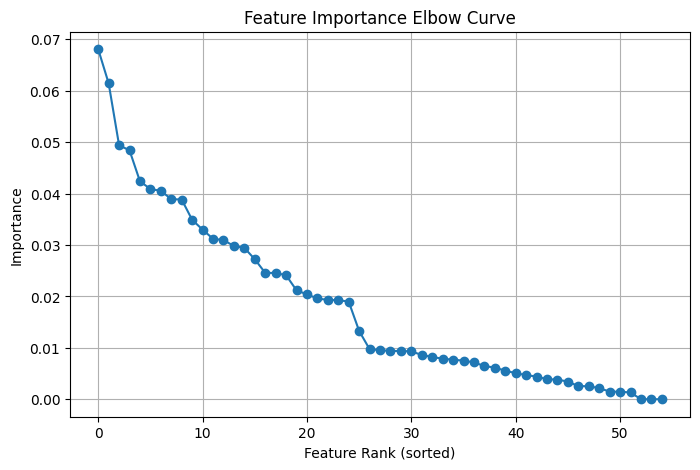

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure feat_imp_df is already created & sorted (from your RF code)

# Reset index so we can use index numbers on x-axis
feat_imp_df = feat_imp_df.reset_index(drop=True)

# Elbow Plot
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(feat_imp_df)), feat_imp_df['Importance'], marker='o')
plt.title('Feature Importance Elbow Curve')
plt.xlabel('Feature Rank (sorted)')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🟩 1. Select Top Raw Features (no dummy columns)
selected_features = [
 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'YearsAtCompany',
 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
 'YearsWithCurrManager', 'NumCompaniesWorked', 'YearsInCurrentRole',
 'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'EnvironmentSatisfaction',
 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction',
 'YearsSinceLastPromotion', 'WorkLifeBalance', 'TrainingTimesLastYear',
 'Education'
]

# 🟩 2. Subset dataset
X_selected = data[selected_features]
y_selected = y

# 🟩 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected,
    test_size=0.20,
    random_state=42,
    stratify=y_selected
)

# 🟩 4. Separate num & cat columns
num_cols_sel = [col for col in selected_features if data[col].dtype != 'object']
cat_cols_sel = [col for col in selected_features if data[col].dtype == 'object']

# 🟩 5. Preprocessing for selected columns
preprocess_sel = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_sel),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_sel)
    ]
)

# 🟩 6. SVM model
svm_model = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=42
)

# 🟩 7. Pipeline
pipeline_svm_sel = Pipeline(steps=[
    ('preprocess', preprocess_sel),
    ('model', svm_model)
])

# 🟩 8. Train + evaluate
pipeline_svm_sel.fit(X_train, y_train)

y_pred = pipeline_svm_sel.predict(X_test)
y_prob = pipeline_svm_sel.predict_proba(X_test)[:, 1]

print("🎯 SVM with Top Selected Features")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


🎯 SVM with Top Selected Features
Accuracy: 0.7993197278911565
Precision: 0.4090909090909091
Recall: 0.574468085106383
F1 Score: 0.4778761061946903
AUC: 0.7671634077009218


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🟩 1. Select Top Raw Features (no dummy columns)
selected_features = [
 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'YearsAtCompany',
 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
 'YearsWithCurrManager', 'NumCompaniesWorked', 'YearsInCurrentRole',
 'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'EnvironmentSatisfaction',
 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction',
 'YearsSinceLastPromotion', 'WorkLifeBalance', 'TrainingTimesLastYear',
 'Education'
]

# 🟩 2. Subset dataset
X_selected = data[selected_features]
y_selected = y

# 🟩 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected,
    test_size=0.30,
    random_state=42,
    stratify=y_selected
)

# 🟩 4. Separate num & cat columns
num_cols_sel = [col for col in selected_features if data[col].dtype != 'object']
cat_cols_sel = [col for col in selected_features if data[col].dtype == 'object']

# 🟩 5. Preprocessing for selected columns
preprocess_sel = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_sel),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_sel)
    ]
)

# 🟩 6. SVM model
svm_model = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=42
)

# 🟩 7. Pipeline
pipeline_svm_sel = Pipeline(steps=[
    ('preprocess', preprocess_sel),
    ('model', svm_model)
])

# 🟩 8. Train + evaluate
pipeline_svm_sel.fit(X_train, y_train)

y_pred = pipeline_svm_sel.predict(X_test)
y_prob = pipeline_svm_sel.predict_proba(X_test)[:, 1]

print("🎯 SVM with Top Selected Features")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


🎯 SVM with Top Selected Features
Accuracy: 0.8049886621315193
Precision: 0.4175824175824176
Recall: 0.5352112676056338
F1 Score: 0.4691358024691358
AUC: 0.7690140845070422


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 🟩 1. Select Top Raw Features (no dummy columns)
selected_features = [
 'MonthlyIncome', 'Age', 'TotalWorkingYears', 'DailyRate', 'YearsAtCompany',
 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate',
 'YearsWithCurrManager', 'NumCompaniesWorked', 'YearsInCurrentRole',
 'OverTime', 'PercentSalaryHike', 'StockOptionLevel', 'EnvironmentSatisfaction',
 'JobLevel', 'JobSatisfaction', 'RelationshipSatisfaction',
 'YearsSinceLastPromotion', 'WorkLifeBalance', 'TrainingTimesLastYear',
 'Education'
]

# 🟩 2. Subset dataset
X_selected = data[selected_features]
y_selected = y

# 🟩 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y_selected,
    test_size=0.40,
    random_state=42,
    stratify=y_selected
)

# 🟩 4. Separate num & cat columns
num_cols_sel = [col for col in selected_features if data[col].dtype != 'object']
cat_cols_sel = [col for col in selected_features if data[col].dtype == 'object']

# 🟩 5. Preprocessing for selected columns
preprocess_sel = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols_sel),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_sel)
    ]
)

# 🟩 6. SVM model
svm_model = SVC(
    kernel='rbf',
    probability=True,
    class_weight='balanced',
    random_state=42
)

# 🟩 7. Pipeline
pipeline_svm_sel = Pipeline(steps=[
    ('preprocess', preprocess_sel),
    ('model', svm_model)
])

# 🟩 8. Train + evaluate
pipeline_svm_sel.fit(X_train, y_train)

y_pred = pipeline_svm_sel.predict(X_test)
y_prob = pipeline_svm_sel.predict_proba(X_test)[:, 1]

print("🎯 SVM with Top Selected Features")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


🎯 SVM with Top Selected Features
Accuracy: 0.8248299319727891
Precision: 0.4666666666666667
Recall: 0.5894736842105263
F1 Score: 0.5209302325581395
AUC: 0.7888758407174122
